In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import string
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/r/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/r/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/r/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/r/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("dataset.xlsx")

# View column names and first few rows
print(df.columns)
print(df.head())


Index(['title', 'rating', 'body'], dtype='object')
                                     title  rating  \
0                         Horrible product       1   
1  Camera quality is not like 48 megapixel       3   
2                                  Overall       4   
3                         A big no from me       1   
4            Put your money somewhere else       1   

                                                body  
0  Very disappointed with the overall performance...  
1                              Camera quality is low  
2  Got the mobile on the launch date,Battery must...  
3  1. It doesn't work with 5.0GHz WiFi frequency....  
4  Not worth buying....faulty software, poor disp...  


In [4]:
# Map numerical ratings to sentiment labels
# 1, 2 -> Negative (0), 3 -> Neutral (1), 4, 5 -> Positive (2)
def map_rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             1440 non-null   object
 1   rating            1440 non-null   int64 
 2   body              1440 non-null   object
 3   feedback          1440 non-null   int64 
 4   verified_reviews  1440 non-null   object
dtypes: int64(2), object(3)
memory usage: 56.4+ KB
None

Missing values:
title               0
rating              0
body                0
feedback            0
verified_reviews    0
dtype: int64

Distribution of sentiment labels:
feedback
2    729
0    512
1    199
Name: count, dtype: int64


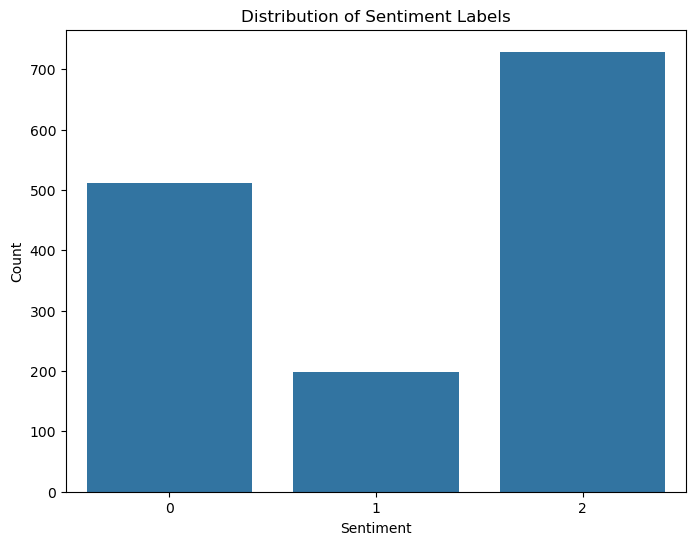

In [5]:
# Apply the mapping
df['feedback'] = df['rating'].apply(map_rating_to_sentiment)
df['verified_reviews'] = df['body']

# Basic EDA
print("\nDataset information:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

print("\nDistribution of sentiment labels:")
print(df['feedback'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='feedback', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [6]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()


In [7]:
# Function to clean and lemmatize text
def clean_and_lemmatize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(filtered_tokens)
    else:
        return ''

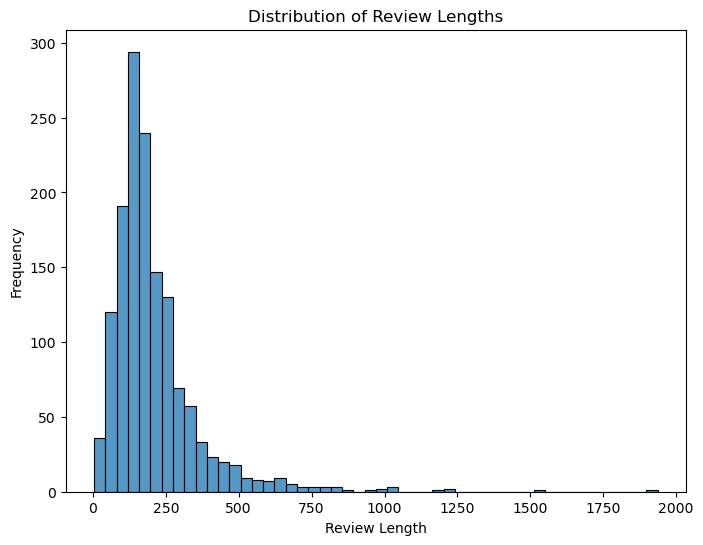

In [8]:
# Apply text cleaning
df['cleaned_review'] = df['verified_reviews'].apply(clean_and_lemmatize_text)
df['review_length'] = df['cleaned_review'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(df['review_length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


Most common 20 words across all reviews:
phone: 1545
good: 1069
camera: 854
battery: 701
samsung: 611
quality: 605
mobile: 506
price: 333
day: 322
product: 310
also: 301
life: 278
like: 276
display: 259
buy: 248
one: 231
dont: 227
use: 225
better: 223
screen: 222


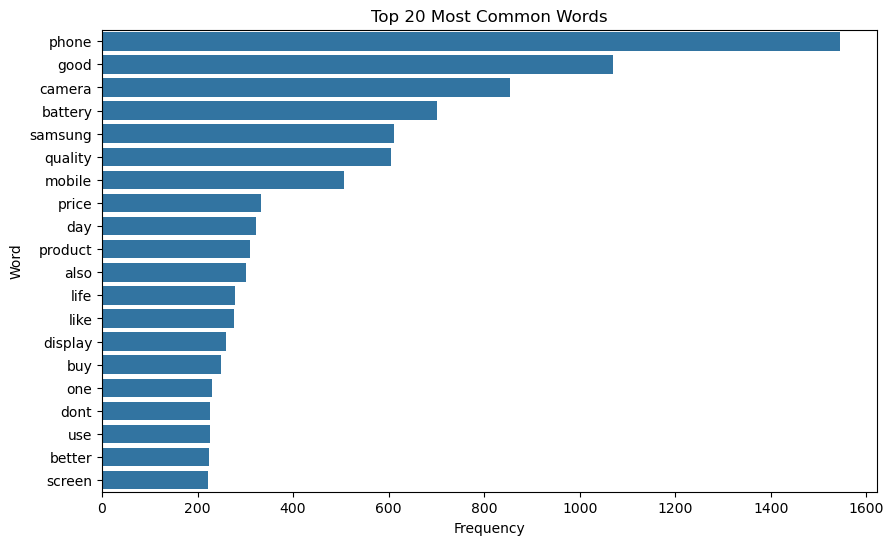

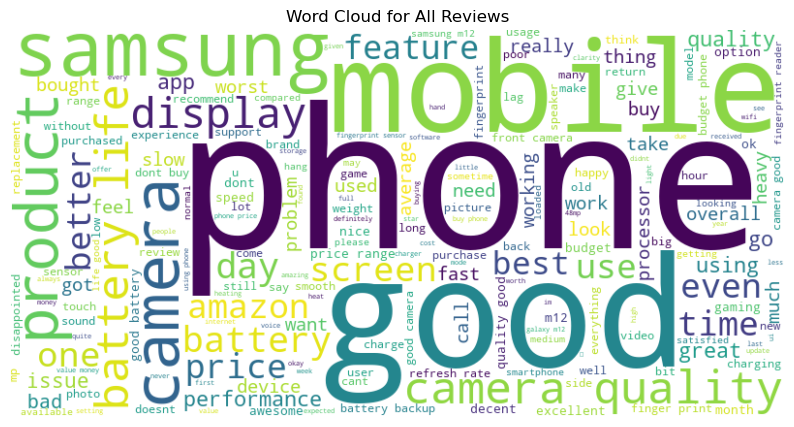

In [9]:
# Word frequency analysis
def get_word_frequency(text):
    words = text.split()
    return Counter(words)

all_reviews_text = ' '.join(df['cleaned_review'])
all_word_freq = get_word_frequency(all_reviews_text)

most_common_words = all_word_freq.most_common(20)
print("\nMost common 20 words across all reviews:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

top_words_df = pd.DataFrame(most_common_words, columns=['word', 'frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=top_words_df)
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Reviews')
plt.show()

In [10]:
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df['verified_reviews'].fillna('')
y = df['feedback']

vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(probability=True),  # Set probability=True for SVC
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

In [11]:
results = {}

Training Logistic Regression...
Accuracy for Logistic Regression: 0.7743
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       111
           1       1.00      0.02      0.04        44
           2       0.73      0.96      0.83       133

    accuracy                           0.77       288
   macro avg       0.86      0.61      0.57       288
weighted avg       0.81      0.77      0.72       288

Training Naive Bayes...
Accuracy for Naive Bayes: 0.6528
              precision    recall  f1-score   support

           0       0.97      0.50      0.66       111
           1       0.00      0.00      0.00        44
           2       0.57      0.99      0.73       133

    accuracy                           0.65       288
   macro avg       0.51      0.50      0.46       288
weighted avg       0.64      0.65      0.59       288

Training Support Vector Machine...
Accuracy for Support Vector Machine: 0.7639
              precision    re

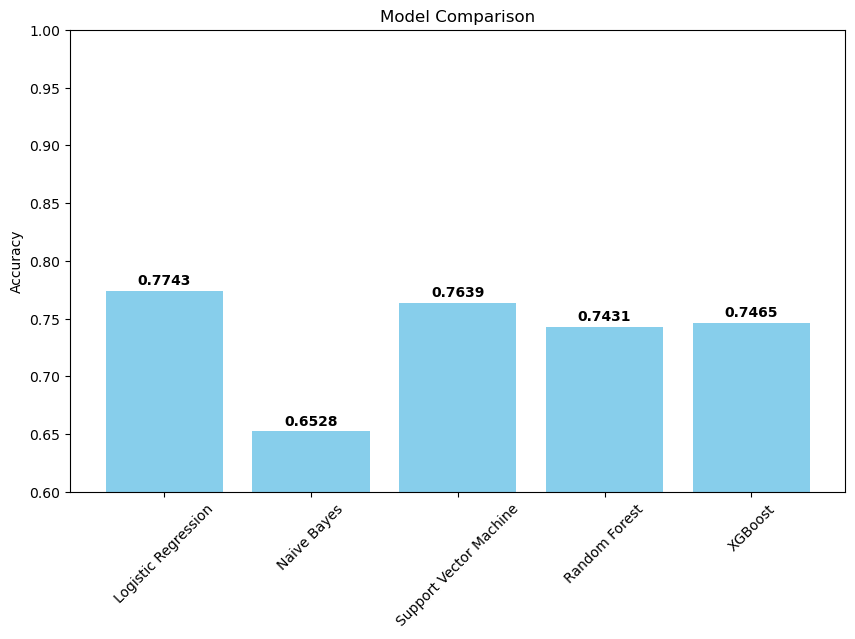

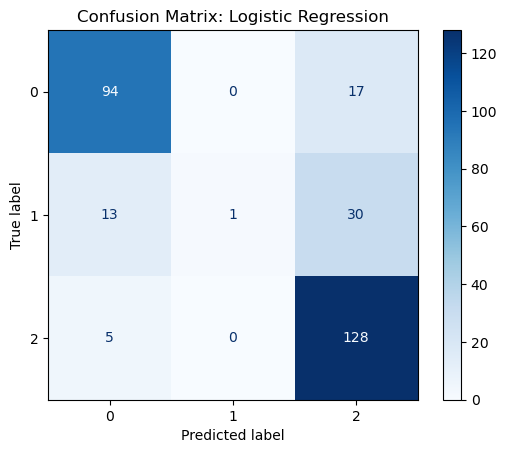

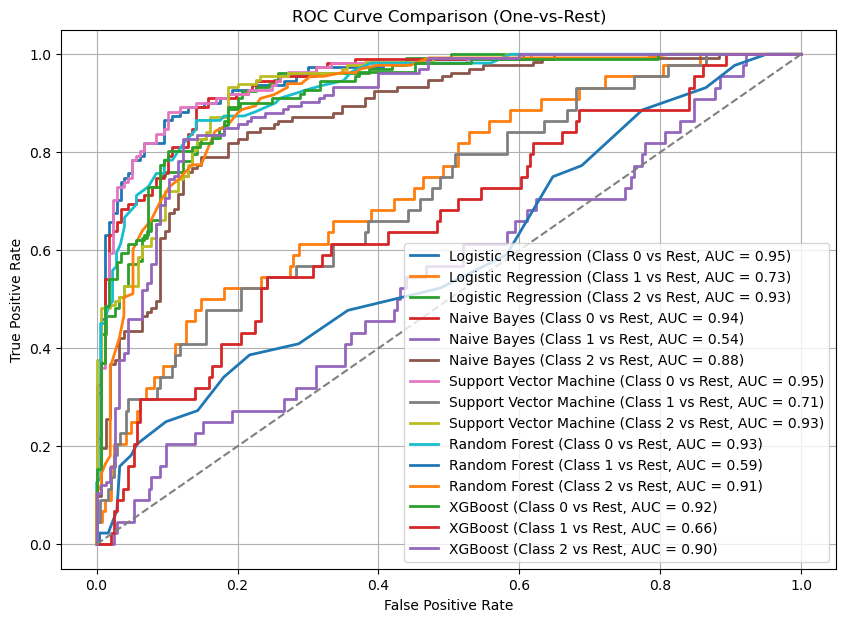

In [12]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {acc:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))
    results[model_name] = acc

best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy: {results[best_model]:.4f}")

plt.figure(figsize=(10,6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylim(0.6, 1.0)
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontweight='bold')
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = models[best_model]
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix: {best_model}')
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

plt.figure(figsize=(10, 7))

# Binarize the labels for multi-class ROC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)
    else:
        # For models that don't have predict_proba (like SVC by default),
        # we need to train a OneVsRestClassifier to get probability estimates
        from sklearn.multiclass import OneVsRestClassifier
        ovr_model = OneVsRestClassifier(model)
        ovr_model.fit(X_train, y_train)
        y_scores = ovr_model.predict_proba(X_test)

    for i in range(y_test_binarized.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (Class {lb.classes_[i]} vs Rest, AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [13]:
import joblib

# Save the best model
joblib.dump(models[best_model], 'best_model.joblib')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

In [14]:
%%writefile app.py
import streamlit as st
import joblib
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK data (if not already downloaded)
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')


st.title('Sentiment Analysis of Product Reviews')

# Load the saved model and vectorizer
model = joblib.load('best_model.joblib')
vectorizer = joblib.load('vectorizer.joblib')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to clean and lemmatize text
def clean_and_lemmatize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(filtered_tokens)
    else:
        return ''

user_input = st.text_area("Enter your review here:")

if st.button('Predict Sentiment'):
    if user_input:
        # Clean and vectorize the user input
        cleaned_input = clean_and_lemmatize_text(user_input)
        input_vectorized = vectorizer.transform([cleaned_input]) # Vectorizer expects a list

        # Make the prediction
        prediction = model.predict(input_vectorized)

        # Map numerical prediction to sentiment label
        sentiment_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
        sentiment_label = sentiment_map.get(prediction[0], 'Unknown')

        # Display the prediction
        st.write(f"Predicted Sentiment: **{sentiment_label}**")
    else:
        st.write("Please enter a review to predict sentiment.")

Overwriting app.py


In [ ]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.29.221:8501

[nltk_data] Downloading package wordnet to /home/r/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /home/r/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /home/r/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /home/r/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
